In [32]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from sklearn import metrics
from pandas import Series as s
from pandas import DataFrame as df
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\\Users\\HP\downloads\kidney_disease.csv")
print(data)

      id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    

In [3]:

data.fillna(0, inplace=True)

In [4]:

def f(row):
    if row['pot'] >0 and row['pot']<3.5:
        val = "Low"
    elif row['pot'] >=3.5 and row['pot']<=5.0:
        val = "safe"
    elif row['pot']>=5.1 and row['pot']<=6.0:
        val = "Caution"
    elif row['pot']>=6.1:
        val="danger"
    else:
        val="nodata"
    return val

In [7]:

data['Outcome'] = data.apply(f, axis=1)

In [8]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,50.325000,74.175000,0.897862,0.90000,0.395000,131.752500,54.698000,2.941875,107.616250,3.609250,10.898000
std,115.614301,18.616951,18.766989,0.328075,1.31313,1.040038,87.995906,50.780641,5.651664,57.548745,3.410949,5.016848
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,40.750000,70.000000,1.010000,0.00000,0.000000,93.000000,25.000000,0.900000,124.000000,3.275000,9.375000
50%,199.500000,54.000000,75.000000,1.015000,0.00000,0.000000,114.500000,40.000000,1.200000,136.000000,4.050000,12.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.625000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:

data.drop('id', axis=1,inplace=True)

In [11]:
print(data.head(10))

    age     bp     sg   al   su       rbc        pc         pcc          ba  \
0  48.0   80.0  1.020  1.0  0.0         0    normal  notpresent  notpresent   
1   7.0   50.0  1.020  4.0  0.0         0    normal  notpresent  notpresent   
2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent  notpresent   
3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present  notpresent   
4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent  notpresent   
5  60.0   90.0  1.015  3.0  0.0         0         0  notpresent  notpresent   
6  68.0   70.0  1.010  0.0  0.0         0    normal  notpresent  notpresent   
7  24.0    0.0  1.015  2.0  4.0    normal  abnormal  notpresent  notpresent   
8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present  notpresent   
9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present  notpresent   

     bgr  ...     wc   rc  htn   dm  cad appet   pe  ane classification  \
0  121.0  ...   7800  5.2  yes  yes   no  good   no   n

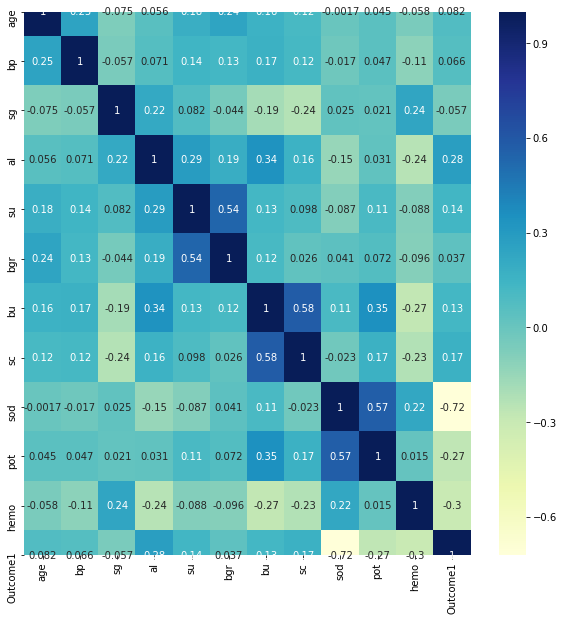

In [31]:
## Correlation
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [12]:

def f(row):
    if row['Outcome'] == 'safe':
        val=0
    else:
        val=1
    return val

In [14]:
data['Outcome1'] = data.apply(f, axis=1)

In [16]:
data1 = data[['age','bp','sg','al','su','rbc','pc','pcc','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','appet','ane','classification','Outcome1']]

In [19]:
data2=pd.DataFrame({col: data1[col].astype('category').cat.codes for col in data1}, index=data1.index)

In [20]:
print(data2)

     age  bp  sg  al  su  rbc  pc  pcc  bgr  bu  ...  sod  pot  hemo  pcv  wc  \
0     41   4   4   1   0    0   2    1   49  24  ...    0    0    91   33  73   
1      6   1   4   4   0    0   2    1    0   6  ...    0    0    50   27  57   
2     55   4   2   2   3    2   2    1  141  41  ...    0    0    33   20  71   
3     41   3   1   4   0    2   1    2   45  44  ...    3    1    49   21  63   
4     44   4   2   2   0    2   2    1   34  14  ...    0    0    53   24  69   
..   ...  ..  ..  ..  ..  ...  ..  ...  ...  ..  ...  ...  ...   ...  ...  ..   
395   48   4   4   0   0    2   2    1   65  36  ...   33   23    94   36  63   
396   35   3   5   0   0    2   2    1    4  19  ...   26    9   102   43  73   
397    9   4   4   0   0    2   2    1   28  14  ...   22   18    95   38  62   
398   12   2   5   0   0    2   2    1   42  37  ...   20   23    79   40  68   
399   51   4   5   0   0    2   2    1   58   6  ...   26    9    95   42  64   

     rc  appet  ane  classi

In [ ]:
#KNN Algorithm

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data2.loc[:, data2.columns != 'Outcome1'], data2['Outcome1'],
    stratify=data2['Outcome1'], random_state=66)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.80


In [ ]:
#Logistic Regression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.loc[:, data2.columns != 'Outcome1'], data2['Outcome1'],
    stratify=data2['Outcome1'], random_state=66)


In [25]:
logreg = LogisticRegression().fit(X_train, y_train)
print( "Training set score: {}".format(logreg.score(X_train, y_train)))
print ("Test set score: {}".format(logreg.score(X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score: 0.8533333333333334
Test set score: 0.77
